In [1]:
import matplotlib.pyplot as plt

In [2]:
import cartopy.crs as ccrs

In [3]:
import netCDF4 as nc

In [4]:
import cartopy.feature as cf

In [5]:
import numpy as np

In [6]:
fn = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc'

In [7]:
ds = nc.Dataset(fn)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    name: FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20150101_20151231
    description: diagnostics 2d bio
    title: diagnostics 2d bio
    Conventions: CF-1.5
    production: An IPSL model
    timeStamp: 2022-Apr-04 13:54:06 CEST
    history: Wed Jul 13 13:57:37 2022: ncrcat -F -O -L 1 -7 -v co2flux_cpl ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20150101_20151231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20160101_20161231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20170101_20171231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20180101_20181231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20190101_20191231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20200101_20201231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_20210101_20211231_diad_T.nc ./nemo/FOCI2.0-NM004_FM_ESM_SSP126os_2014CC105_1m_202

In [8]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 511
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 722
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 1020
<class 'netCDF4._netCDF4.Dimension'>: name = 'axis_nbounds', size = 2


In [9]:
for var in ds.variables.values(): #print all variables 
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (511, 722)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
unlimited dimensions: 
current shape = (511, 722)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_centered(time_counter)
    standard_name: time
    long_name: Time axis
    calendar: gregorian
    units: seconds since 2015-01-01 00:00:00
    time_origin: 2015-01-01 00:00:00
    bounds: time_centered_bounds
unlimited dimensions: time_counter
current shape = (1020,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_centered_bounds(time_counter, axis_nbounds)
unlimited dimensions: time_counter

In [10]:
ds.variables.values()

dict_values([<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (511, 722)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
unlimited dimensions: 
current shape = (511, 722)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
float64 time_centered(time_counter)
    standard_name: time
    long_name: Time axis
    calendar: gregorian
    units: seconds since 2015-01-01 00:00:00
    time_origin: 2015-01-01 00:00:00
    bounds: time_centered_bounds
unlimited dimensions: time_counter
current shape = (1020,)
filling on, default _FillValue of 9.969209968386869e+36 used, <class 'netCDF4._netCDF4.Variable'>
float64 time_centered_bounds(time_counter, axis_nbounds)
unlimited dimensio

In [11]:
print(ds.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'co2flux_cpl'])


In [12]:
co2flux = ds['co2flux_cpl']

In [13]:
co2flux 

<class 'netCDF4._netCDF4.Variable'>
float64 co2flux_cpl(time_counter, y, x)
    long_name: co2 flux calc in ECHAM
    units: kg/m2/sec
    online_operation: average
    interval_operation: 2160 s
    interval_write: 1 month
    cell_methods: time: mean (interval: 2160 s)
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1020, 511, 722)
filling on

In [14]:
latitude = ds['nav_lat'][:] 
longitude = ds['nav_lon'][:] 
time = ds['time_centered'][:]

In [15]:
x = longitude
y = latitude

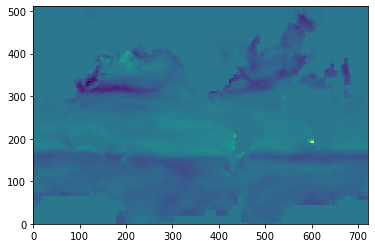

In [16]:
plt.figure()
plt.pcolor(co2flux[0,:,:])

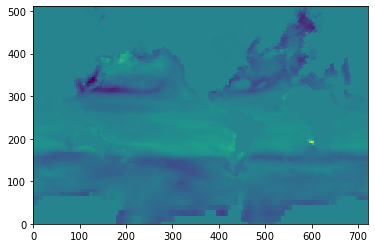

In [21]:
plt.pcolor(co2flux[1,:,:])

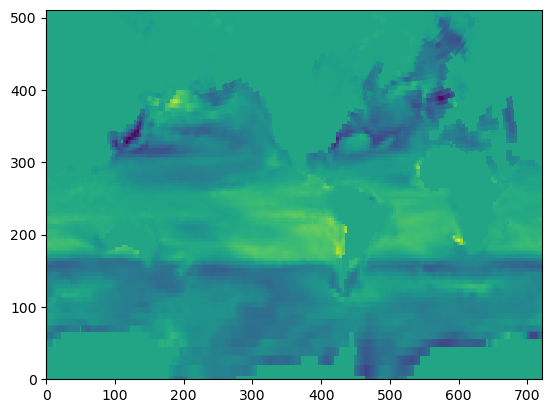

In [104]:
plt.pcolor(co2flux[2,:,:])

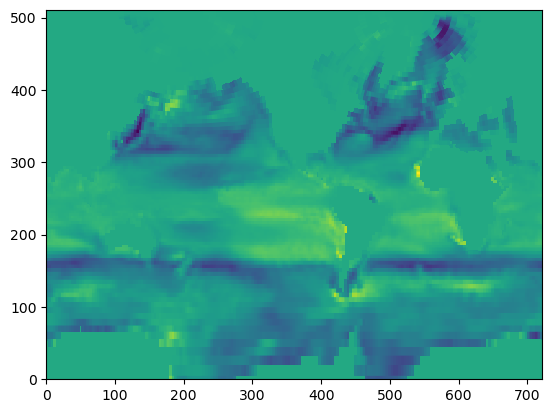

In [105]:
plt.pcolor(co2flux[3,:,:])

In [106]:
latitude = np.arange(-90, 91, 2.5)
longitude = np.arange(-180, 180, 2.5)

print('latitude = \n{}'.format(latitude[:]))
print('longitude = \n{}'.format(longitude[:]))

latitude = 
[-90.  -87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5
 -60.  -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40.  -37.5 -35.  -32.5
 -30.  -27.5 -25.  -22.5 -20.  -17.5 -15.  -12.5 -10.   -7.5  -5.   -2.5
   0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90. ]
longitude = 
[-180.  -177.5 -175.  -172.5 -170.  -167.5 -165.  -162.5 -160.  -157.5
 -155.  -152.5 -150.  -147.5 -145.  -142.5 -140.  -137.5 -135.  -132.5
 -130.  -127.5 -125.  -122.5 -120.  -117.5 -115.  -112.5 -110.  -107.5
 -105.  -102.5 -100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5
  -80.   -77.5  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5
  -55.   -52.5  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5
  -30.   -27.5  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5
   -5.    -2.5    0.     2.5    

In [119]:
x = co2flux
x.shape

(1020, 511, 722)